In [1]:
! pip install -q kaggle

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

 97% 321M/330M [00:02<00:00, 203MB/s]
100% 330M/330M [00:04<00:00, 84.2MB/s]


In [6]:
! mkdir faces

In [7]:
! unzip /content/face-mask-12k-images-dataset.zip -d faces

Streaming output truncated to the last 5000 lines.
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1855.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1856.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1857.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1858.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1859.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1860.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1861.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1862.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1863.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1864.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1865.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1866.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1867.png  
  inflating: faces/Face Mask Dataset/Train/WithoutMask/1868.png  
  inflating: faces/Face M

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
from scipy.spatial import distance
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/face'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [26]:
import cv2
face_model = cv2.CascadeClassifier('/content/haarcascade-frontalface-default.xml')

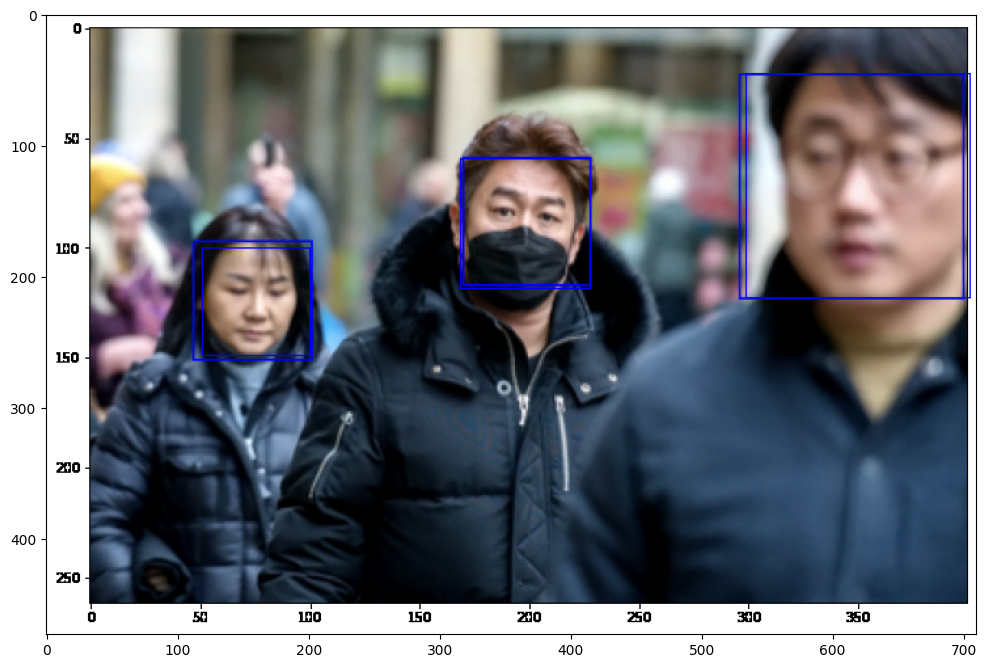

In [27]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/__results___7_1.png')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

In [4]:
# Imports
import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras import optimizers

from keras.models import Model, Sequential
from keras import layers
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator

In [5]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    fig, axs = plt.subplots(1, 2, figsize=(6, 4))

    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()

    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()

    plt.tight_layout()
    plt.show()

In [18]:
# The lowest face in the photo
MIN_DISTANCE = 130

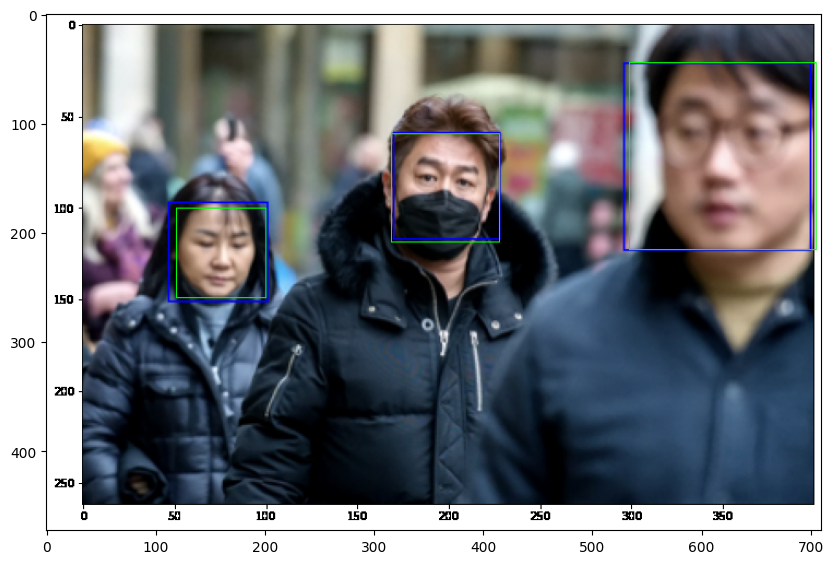

In [28]:
if len(faces)>=2:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

In [8]:
#Load train and test set
train_dir = '/content/faces/Face Mask Dataset/Train'
test_dir = '/content/faces/Face Mask Dataset/Test'
val_dir = '/content/faces/Face Mask Dataset/Validation'

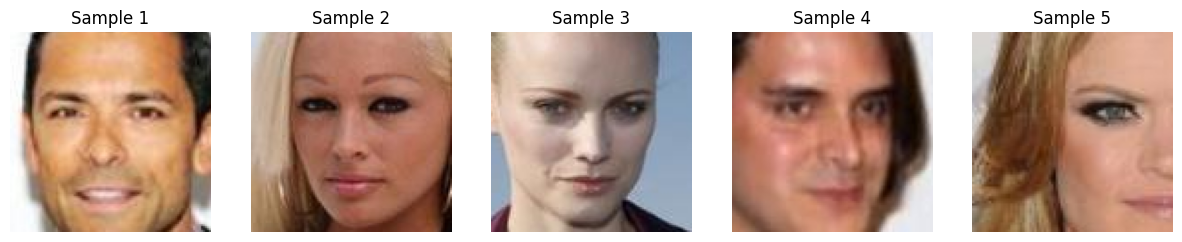

In [ ]:
import matplotlib.pyplot as plt
import os
import random

# Define a function to show a sample of data
def show_data_sample(dataset_dir, num_samples=5):
    # List all files in the dataset directory
    file_names = os.listdir(dataset_dir)

    # Select random samples
    sample_files = random.sample(file_names, num_samples)

    # Plot the images
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, file_name in enumerate(sample_files):
        img_path = os.path.join(dataset_dir, file_name)
        img = plt.imread(img_path)
        axes[i].imshow(img)
        axes[i].axis('off')
        axes[i].set_title(f'Sample {i+1}')
    plt.show()

# Usage
show_data_sample('/content/faces/Face Mask Dataset/Train/WithoutMask', num_samples=5)


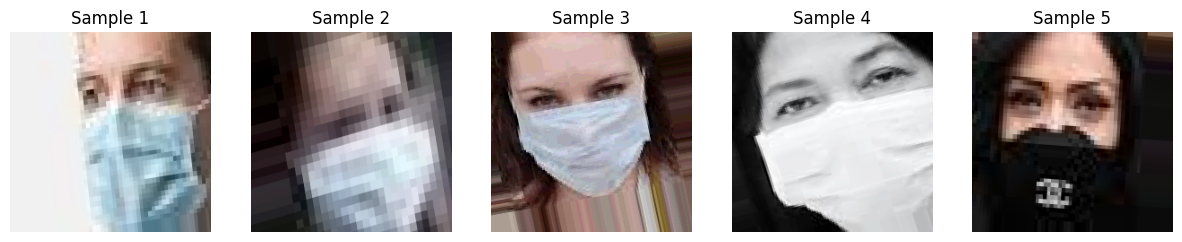

In [ ]:
show_data_sample('/content/faces/Face Mask Dataset/Train/WithMask', num_samples=5)

In [9]:
# Data augmentation
train_datagen = ImageDataGenerator(rescale=1.0/255, horizontal_flip=True, zoom_range=0.2,shear_range=0.2)
train_generator = train_datagen.flow_from_directory(directory=train_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

val_datagen = ImageDataGenerator(rescale=1.0/255)
val_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = train_datagen.flow_from_directory(directory=val_dir,target_size=(228,228),class_mode='categorical',batch_size=32)

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


In [10]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(228,228,3)) # load VGG19 Model
# freeze layer
for layer in vgg19.layers:
    layer.trainable = False

model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(2,activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 2)                 50178     
                                                                 
Total params: 20074562 (76.58 MB)
Trainable params: 50178 (196.01 KB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [11]:
# add optimizer of model and loss and metrics
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics ="accuracy")

In [12]:
# fit model
history = model.fit(
    train_generator,
    epochs=5,
    validation_data=val_generator,)

Epoch 1/5
313/313 [==============================] - 179s 543ms/step - loss: 0.1216 - accuracy: 0.9599 - val_loss: 0.0360 - val_accuracy: 0.9850
Epoch 2/5
313/313 [==============================] - 161s 514ms/step - loss: 0.0266 - accuracy: 0.9929 - val_loss: 0.0160 - val_accuracy: 0.9950
Epoch 3/5
313/313 [==============================] - 157s 500ms/step - loss: 0.0247 - accuracy: 0.9920 - val_loss: 0.0434 - val_accuracy: 0.9812
Epoch 4/5
313/313 [==============================] - 162s 518ms/step - loss: 0.0195 - accuracy: 0.9928 - val_loss: 0.0248 - val_accuracy: 0.9875
Epoch 5/5
313/313 [==============================] - 155s 494ms/step - loss: 0.0224 - accuracy: 0.9927 - val_loss: 0.0266 - val_accuracy: 0.9875


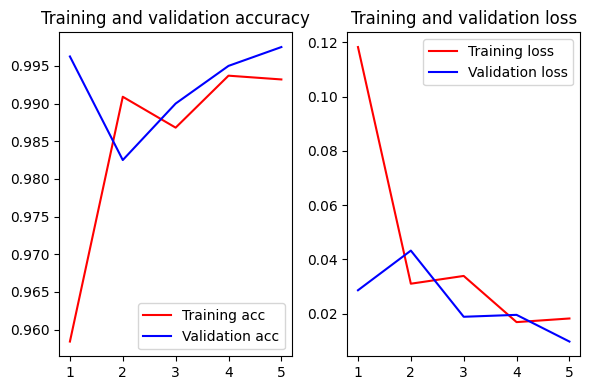

In [ ]:
# visualize Training validation (loss and accuracy)
visualize(history)

In [ ]:
# print loss_test and Accuracy
loss_test,accuracy_test=model.evaluate(test_generator)
print(f'the loss is_test {loss_test} and the accuracy_test ={accuracy_test}')

25/25 [==============================] - 11s 429ms/step - loss: 0.0095 - accuracy: 0.9962
the loss is_test 0.009453759528696537 and the accuracy_test =0.9962499737739563


In [ ]:
# save model
from keras.models import load_model
model.save("mask_detector_v1.model", save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
model.save('masknet.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


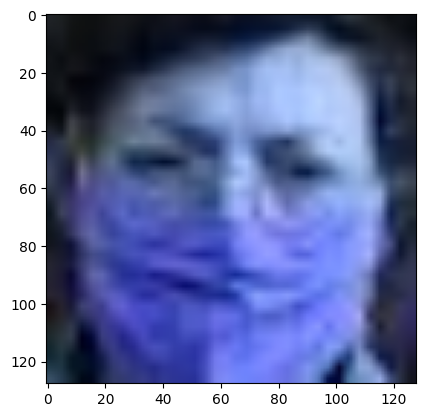

In [13]:
# show sample of test images
sample_mask_img = cv2.imread('/content/faces/Face Mask Dataset/Test/WithMask/1163.png')
sample_mask_img = cv2.resize(sample_mask_img,(128,128))
plt.imshow(sample_mask_img)
sample_mask_img = np.reshape(sample_mask_img,[1,128,128,3])
sample_mask_img = sample_mask_img/255.0

In [14]:
# predict of images (0 or 1 )
resized_img = tf.image.resize(sample_mask_img, (228, 228))
model.predict(resized_img)

1/1 [==============================] - 1s 1s/step


array([[0.00738556, 0.9838389 ]], dtype=float32)

1/1 [==============================] - 0s 157ms/step


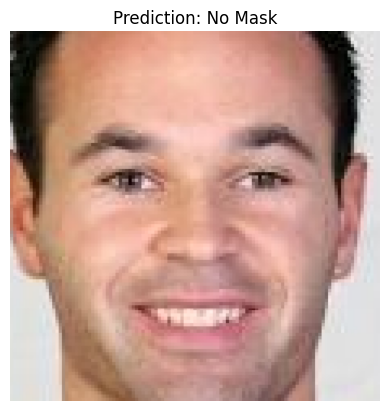

In [24]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import load_img
from keras.preprocessing import image
# Define a function to predict mask or no mask and show the image
def predict_and_show(image_path, model):
    img = image.load_img(image_path, target_size=(228, 228))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalization

    # Predict
    prediction = model.predict(img_array)
    if prediction[0][0] > 0.5:
        prediction_label = "Mask"
    else:
        prediction_label = "No Mask"

    # Show image with prediction
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Prediction: {prediction_label}')
    plt.show()

# Usage
predict_and_show('/content/faces/Face Mask Dataset/Test/WithoutMask/1177.png', model)



1/1 [==============================] - 0s 18ms/step


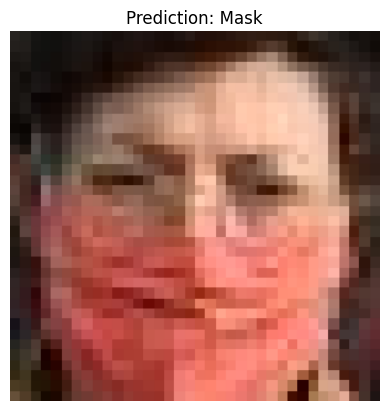

In [25]:
# function to predict mask or no mask and show the image
predict_and_show('/content/faces/Face Mask Dataset/Test/WithMask/1163.png', model)

In [29]:
mask_label = {0:'MASK',1:'NO MASK'}
dist_label = {0:(0,255,0),1:(255,0,0)}

1/1 [==============================] - 0s 20ms/step


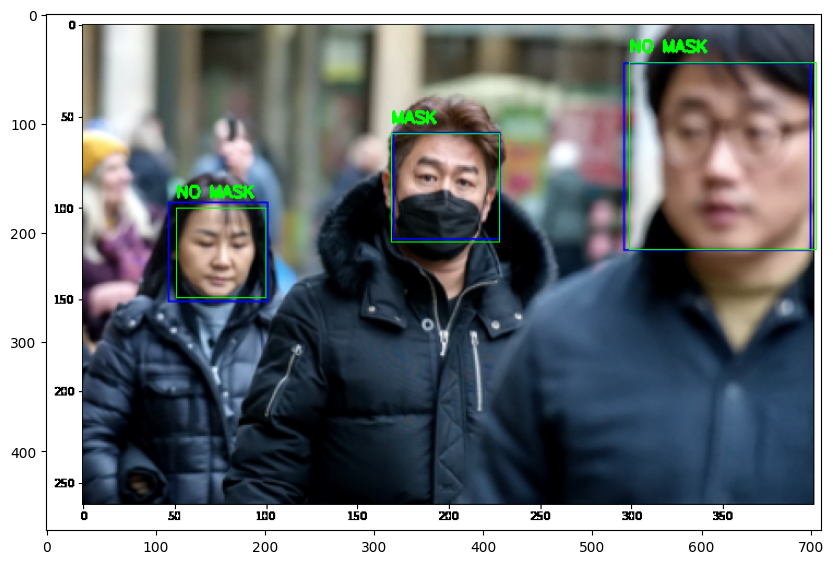

In [32]:
if len(faces)>=1:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(228,228))
        crop = np.reshape(crop,[1,228,128,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

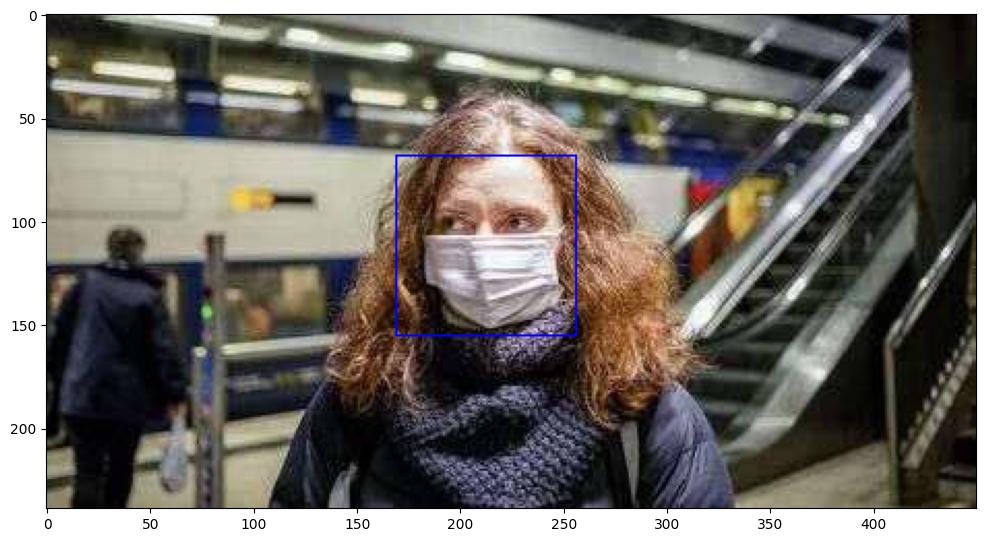

In [40]:
import matplotlib.pyplot as plt
#trying it out on a sample image
img = cv2.imread('/content/crowd_mask23.jpg')

img = cv2.cvtColor(img, cv2.IMREAD_GRAYSCALE)

faces = face_model.detectMultiScale(img,scaleFactor=1.1, minNeighbors=4) #returns a list of (x,y,w,h) tuples

out_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image

#plotting
for (x,y,w,h) in faces:
    cv2.rectangle(out_img,(x,y),(x+w,y+h),(0,0,255),1)
plt.figure(figsize=(12,12))
plt.imshow(out_img)

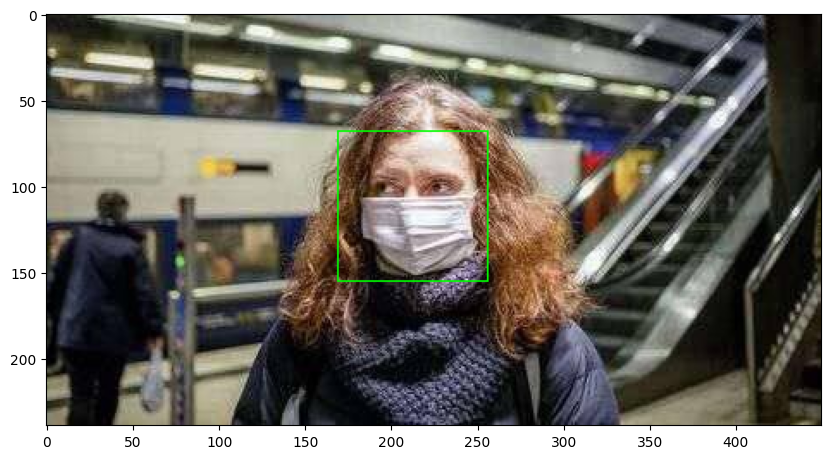

In [41]:
if len(faces)>=1:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        if label[i]==1:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(255,0,0),1)
        else:
            cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")

1/1 [==============================] - 0s 31ms/step


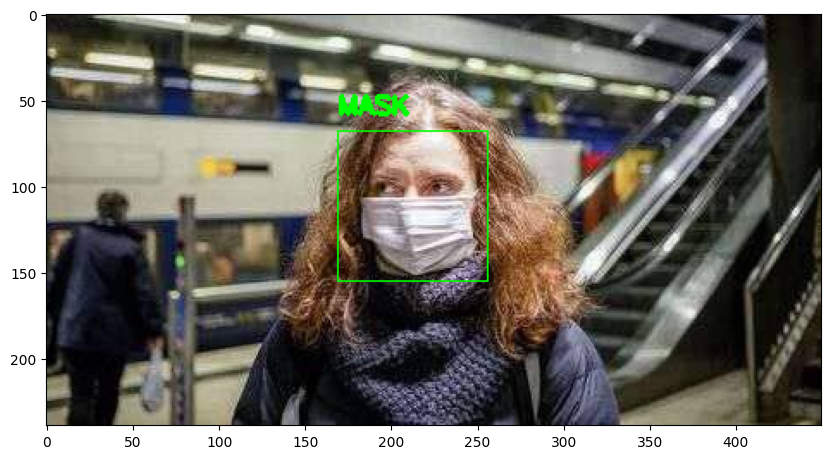

In [42]:
if len(faces)>=1:
    label = [0 for i in range(len(faces))]
    for i in range(len(faces)-1):
        for j in range(i+1, len(faces)):
            dist = distance.euclidean(faces[i][:2],faces[j][:2])
            if dist<MIN_DISTANCE:
                label[i] = 1
                label[j] = 1
    new_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #colored output image
    for i in range(len(faces)):
        (x,y,w,h) = faces[i]
        crop = new_img[y:y+h,x:x+w]
        crop = cv2.resize(crop,(228,228))
        crop = np.reshape(crop,[1,228,228,3])/255.0
        mask_result = model.predict(crop)
        cv2.putText(new_img,mask_label[mask_result.argmax()],(x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,dist_label[label[i]],2)
        cv2.rectangle(new_img,(x,y),(x+w,y+h),dist_label[label[i]],1)
    plt.figure(figsize=(10,10))
    plt.imshow(new_img)

else:
    print("No. of faces detected is less than 2")